In [1]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
import math
import imutils
# from PIL import Image
from IPython import display
import time

In [2]:
print(cv2. __version__)

4.7.0


In [3]:
# Input: path to image
path_to_image = '/Users/danielfiuzadosil/Documents/GitHub_Repo/Data-Science/Tools/Image_Processing/images/card/3.jpeg'

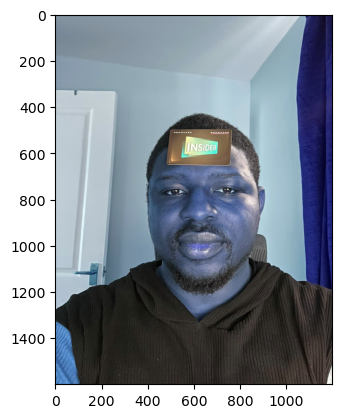

In [4]:
# Read Image from path
image = cv2.imread(path_to_image)
image_0 = image.copy()
plt.imshow(image)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


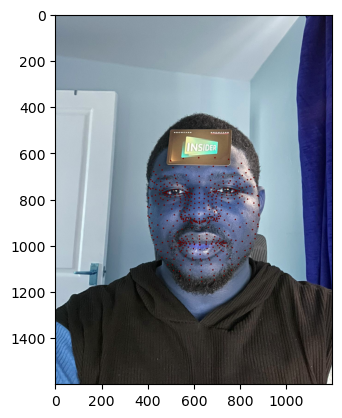

In [5]:
image_landmarks = image
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5)
result = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
height, width, _ = image_landmarks.shape
for facial_landmarks in result.multi_face_landmarks:
    for i in range(0, 468):
        pt1 = facial_landmarks.landmark[i]
        x = int(pt1.x * width)
        y = int(pt1.y * height)
        cv2.circle(image_landmarks, (x, y), 3, (100, 0, 0), -1)
plt.imshow(image_landmarks)
mesh_points= np.array([np.multiply([p.x, p.y], [width, height]).astype(int) for p in result.multi_face_landmarks[0].landmark])

In [6]:
landmarks = {
    'topToBottom': [10, 152],
    'leftToRight': [234, 454],
    'rightEyeIris': [473, 474, 475, 476, 477],
    'leftEyeIris': [468, 469, 470, 471, 472],
    'outerRightEyebrowUpper': 70,
    'outerLeftEyebrowUpper': 300,
    'silhouette': [10,  338, 297, 332, 284, 251, 389, 356, 454, 323, 361, 288,
    397, 365, 379, 378, 400, 377, 152, 148, 176, 149, 150, 136,
    172, 58,  132, 93,  234, 127, 162, 21,  54,  103, 67,  109],
}
(l_cx, l_cy), l_radius = cv2.minEnclosingCircle(mesh_points[landmarks['rightEyeIris']])
(r_cx, r_cy), r_radius = cv2.minEnclosingCircle(mesh_points[landmarks['leftEyeIris']])
center_left_iris = np.array([l_cx, l_cy], dtype=np.int32)
center_right_iris = np.array([r_cx, r_cy], dtype=np.int32)

In [7]:
def distanceCalculate(p):
    p1 = p[0]
    p2 = p[1]
    dis = ((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2) ** 0.5
    return dis

In [8]:
def angleLinePoints(p):
    p1 = p[0]
    p2 = p[1]
    # 
    p1_x = p1[0]
    p1_y = p1[1]
    p2_x = p2[0]
    p2_y = p2[1]
    # 
    d_x = p2_x - p1_x
    d_y = p2_y - p1_y
    # 
    angle_radians = np.arctan(d_y/d_x)
    angle_degrees = math.degrees(angle_radians)
    return angle_degrees

In [9]:
width_face_px = distanceCalculate(mesh_points[landmarks['leftToRight']])
height_face_px = distanceCalculate(mesh_points[landmarks['topToBottom']])
print(width_face_px, height_face_px)

474.06750574153466 535.1579206178303


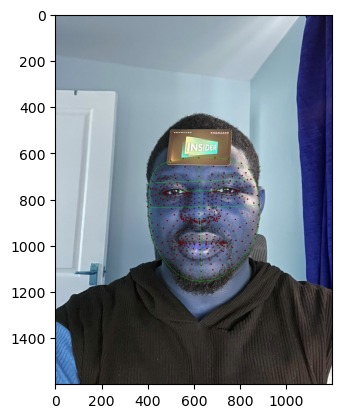

In [10]:
plt.imshow(cv2.polylines(image, [mesh_points[landmarks['topToBottom']]], 1, (0,255,0), 1))
plt.imshow(cv2.polylines(image, [mesh_points[landmarks['leftToRight']]], 1, (0,255,0), 1))
plt.imshow(cv2.polylines(image, [mesh_points[landmarks['silhouette']]], 1, (0,255,0), 1))
plt.imshow(cv2.line(image, center_left_iris, center_right_iris, (0, 255, 0), 1))
plt.imshow(cv2.line(image, mesh_points[landmarks['outerLeftEyebrowUpper']], mesh_points[landmarks['outerRightEyebrowUpper']], (0, 255, 0), 1))

In [11]:
ipd = distanceCalculate([center_left_iris, center_right_iris])
vertical_angle = 90 - angleLinePoints(mesh_points[landmarks['topToBottom']])
horizonal_angle = angleLinePoints(mesh_points[landmarks['leftToRight']])

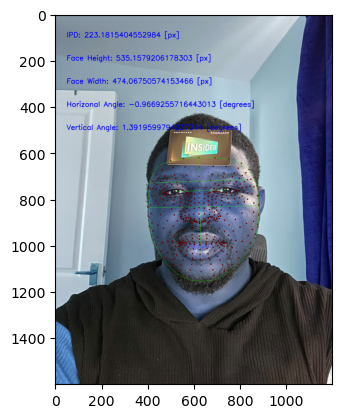

In [12]:
plt.imshow(cv2.putText(image, f'IPD: {str(ipd)} [px]', 
            (50,100), cv2.FONT_HERSHEY_SIMPLEX,
            1, (0,0,255), 2))
plt.imshow(cv2.putText(image, f'Face Height: {str(height_face_px)} [px]', 
            (50,200), cv2.FONT_HERSHEY_SIMPLEX,
            1, (0,0,255),2))
plt.imshow(cv2.putText(image, f'Face Width: {str(width_face_px)} [px]', 
            (50,300), cv2.FONT_HERSHEY_SIMPLEX,
            1, (0,0,255), 2))
plt.imshow(cv2.putText(image, f'Horizonal Angle: {str(horizonal_angle)} [degrees]', 
            (50,400), cv2.FONT_HERSHEY_SIMPLEX,
            1, (0,0,255), 2))
plt.imshow(cv2.putText(image, f'Vertical Angle: {str(vertical_angle)} [degrees]', 
            (50,500), cv2.FONT_HERSHEY_SIMPLEX,
            1, (0,0,255), 2))


In [13]:
x_start = mesh_points[landmarks['outerRightEyebrowUpper']][0]
y_start = mesh_points[landmarks['outerRightEyebrowUpper']][1] - 0.6*height_face_px
x_end, y_end =  mesh_points[landmarks['outerLeftEyebrowUpper']]
start_point = (int(x_start), int(y_start))
end_point = (int(x_end), int(y_end))

True

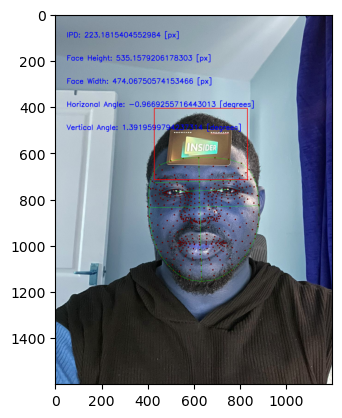

In [14]:
plt.imshow(cv2.rectangle(image, start_point, end_point, (255,0,0), 2))
cv2.imwrite('photo_with_measurements.jpg', image)

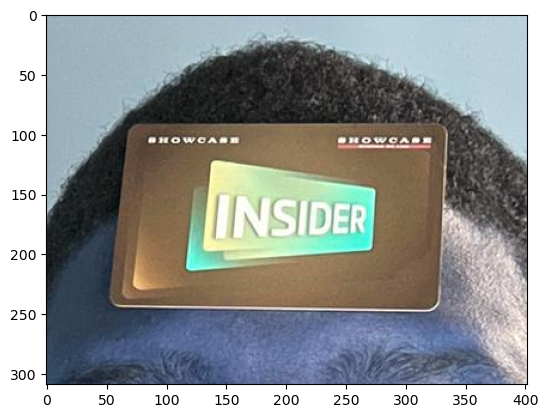

In [15]:
image_0 = cv2.imread(path_to_image)
crop_image = image_0[int(y_start):int(y_end),int(x_start):int(x_end)]
crop_image_0 = crop_image.copy()
image = crop_image
plt.imshow(crop_image)

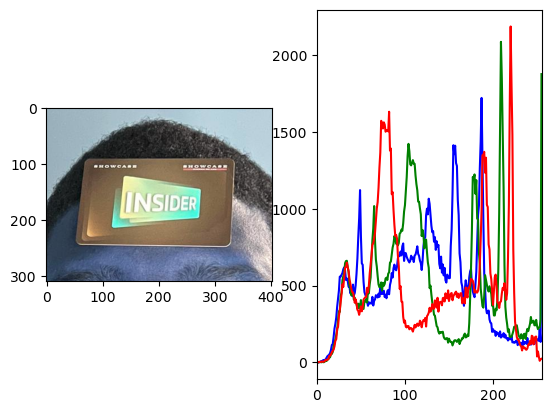

In [16]:
plt.subplot(121),plt.imshow(image)
plt.subplot(122),
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [17]:
def auto_canny(image, sigma=0.5):
    v = np.median(image)
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    return cv2.Canny(image, lower, upper)

https://itecnote.com/tecnote/opencv-detect-non-closed-contour-on-opencv/

In [18]:
B, G, R = cv2.split(image) 
blur = cv2.medianBlur(image,5)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
# thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
thresh = cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
# edges = cv2.Canny(image,650,900)
edges = cv2.Canny(image,30,800)
edges_auto = auto_canny(image)

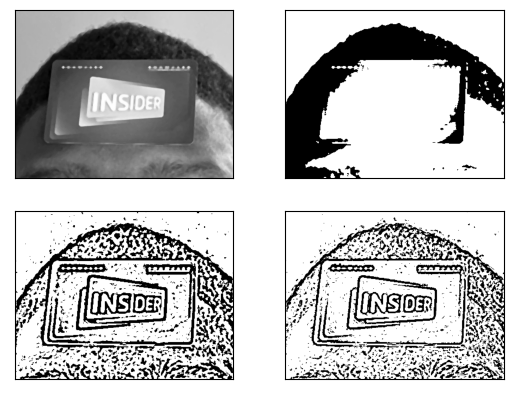

In [19]:
ret,th1 = cv2.threshold(gray_blur,90,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
images = [gray_blur, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.xticks([]),plt.yticks([])
plt.show()

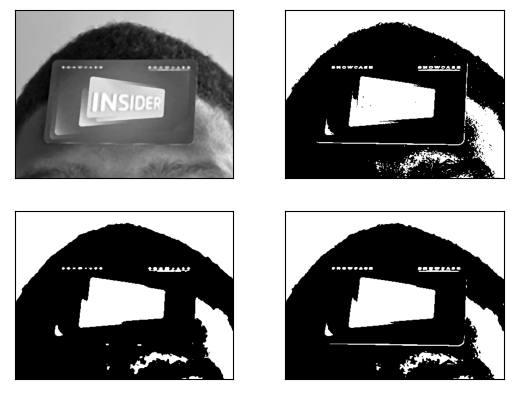

In [20]:
ret1,th1 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret2,th2 = cv2.threshold(gray_blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret3,th3 = cv2.threshold(cv2.GaussianBlur(gray,(5,5),0),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
images = [gray_blur, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.xticks([]),plt.yticks([])
plt.show()

(<AxesSubplot: >, <matplotlib.image.AxesImage at 0x7ff221aa5430>)

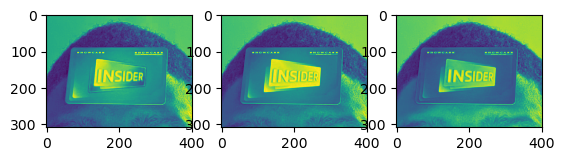

In [21]:
plt.subplot(131),plt.imshow(B)
plt.subplot(132),plt.imshow(G)
plt.subplot(133),plt.imshow(R)

(Text(0.5, 1.0, 'Threshold'), ([], []), ([], []))

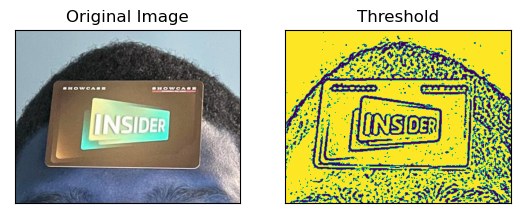

In [22]:
plt.subplot(121),plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thresh)
plt.title('Threshold'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Canny Algorithm'), ([], []), ([], []))

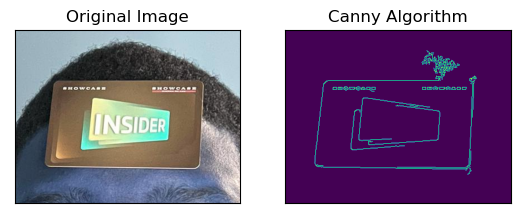

In [23]:

plt.subplot(121),plt.imshow(image)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges)
plt.title('Canny Algorithm'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Canny Algorithm - Auto'), ([], []), ([], []))

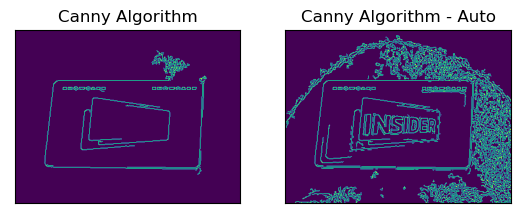

In [24]:
plt.subplot(121),plt.imshow(edges)
plt.title('Canny Algorithm'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges_auto)
plt.title('Canny Algorithm - Auto'), plt.xticks([]), plt.yticks([])

True

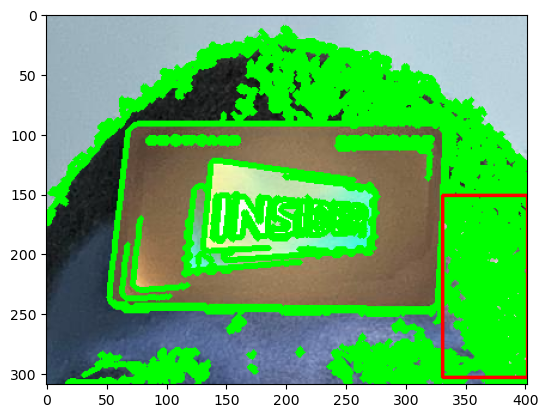

In [25]:
CONTOURS = 'CannyAuto'
# ['Canny', 'CannyAuto', 'Threshold']

if CONTOURS == 'Canny':
    contours_canny, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    plt.imshow(cv2.drawContours(image, contours_canny, -1, (0,255,0), 3))
    contours = imutils.grab_contours(cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE))
    c = max(contours, key=cv2.contourArea)
    (x, y, w, h) = cv2.boundingRect(c)
    plt.imshow(cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2))  
elif CONTOURS == 'CannyAuto':
    contours_canny, _ = cv2.findContours(edges_auto, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    plt.imshow(cv2.drawContours(image, contours_canny, -1, (0,255,0), 3))
    contours = imutils.grab_contours(cv2.findContours(edges_auto, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE))
    c = max(contours, key=cv2.contourArea)
    (x, y, w, h) = cv2.boundingRect(c)
    plt.imshow(cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2))
elif CONTOURS == 'Threshold':
    contours_threshold, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    plt.imshow(cv2.drawContours(image, contours_threshold, -1, (0,255,0), 3))
    contours = imutils.grab_contours(cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE))
    c = max(contours, key=cv2.contourArea)
    (x, y, w, h) = cv2.boundingRect(c)
    plt.imshow(cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2))
# 
cv2.imwrite('card_with_edges.jpg', image)